# Subsetting and Descriptive Stats

## Before your start:
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [166]:
# import libraries here
import pandas as pd
import numpy as np
import sqlalchemy
import re

# Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [197]:
# your code here
CREDENTIALS

NameError: name 'CREDENTIALS' is not defined

In [8]:
engine = sqlalchemy.create_engine(connection_string)

In [9]:
engine.table_names()

['temp_states']

#### Print `temp`.

In [10]:
# your code here
query = 'SELECT * FROM temp_states'
temp = pd.read_sql(query, engine)

In [11]:
temp.to_csv('temp.csv')

#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [12]:
# your code here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [13]:
"""
City and State are strings while Temperature, fittingly, is a float.
"""

'\nCity and State are strings while Temperature, fittingly, is a float.\n'

#### Select the rows where state is New York.

In [14]:
# your code here
temp[temp['State'] == 'New York']

City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333

#### What is the average temperature of cities in New York?

In [16]:
# your code here
temp[temp['State'] == 'New York'].mean()

Temperature    10.740741
dtype: float64

#### Which states and cities have a temperature above 15 degrees Celsius?

In [17]:
# your code here
temp[temp['Temperature'] > 15]

City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000

#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [35]:
# your code here
temp['City'][temp['Temperature'] > 15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [36]:
# your code here
temp['City'][(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and standard deviation of the temperature of each state.

In [37]:
# your code here
temp.groupby('State').mean()

Temperature
State                   
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741

In [38]:
temp.groupby('State').std()

Temperature
State                   
Connecticut     1.964186
New Jersey      1.571348
New York        8.133404

# Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [41]:
driver = 'mysql+pymysql:'
user = 'ironhacker_read'
password = 'ir0nhack3r'
ip = '35.239.232.23'
database = 'employees'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'

engine = sqlalchemy.create_engine(connection_string)

In [42]:
engine.table_names()

['absences', 'employees', 'employees_advanced']

In [44]:
# your code here
query = 'SELECT * FROM employees'
employees = pd.read_sql(query, engine)

#### Explore the data types of the `employees` dataframe. Comment your results.

In [55]:
# your code here
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [ ]:
"""
Seems fine, things that should be strings are strings an years and salary are ints"""

#### What's the average salary in this company?

In [46]:
# your code here
employees['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [47]:
# your code here
employees['Salary'].max()

70

#### What's the lowest salary?

In [48]:
# your code here
employees['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [59]:
# your code here
employees.sort_values('Salary', ascending=False).tail()

Name Department Education Gender      Title  Years  Salary
5    Eva      Sales  Bachelor      F  associate      2      55
0   Jose         IT  Bachelor      M    analyst      1      35
3  Sonia         HR  Bachelor      F    analyst      4      35
1  Maria         IT    Master      F    analyst      2      30
2  David         HR    Master      M    analyst      2      30

#### Find all the information about an employee called David.

In [64]:
# your code here
employees[employees['Name'] == 'David']

Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30

#### Could you return only David's salary?

In [65]:
# your code here
employees['Salary'][employees['Name'] == 'David']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [67]:
# your code here
employees[employees['Title'] == 'associate']

Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60

#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [68]:
# Method 1
# your code here
employees.head(3)

Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30

In [80]:
# Method 2
# your code here
employees.iloc[-3:]

Name Department Education Gender      Title  Years  Salary
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70

#### Find the employees whose title is associate and whose salary is above 55.

In [84]:
# your code here
employees[(employees.Title == 'associate') & (employees.Salary > 55)]

Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60

#### Group the employees by number of years of employment. What are the average salaries in each group?

In [85]:
# your code here
employees.groupby('Years').mean()

Salary
Years           
1      35.000000
2      38.333333
3      55.000000
4      35.000000
7      60.000000
8      70.000000

####  What is the average salary per title?

In [86]:
# your code here
employees.groupby('Title').mean()

Years     Salary
Title                      
VP          8.00  70.000000
analyst     2.25  32.500000
associate   4.00  56.666667

####  Find the salary quartiles.


In [90]:
# your code here
employees.Salary.quantile([.25, .5, .75])

0.25    35.0
0.50    55.0
0.75    60.0
Name: Salary, dtype: float64

#### Is the mean salary different per gender?

In [91]:
# your code here
employees.groupby('Gender').mean()

Years  Salary
Gender               
F         4.0    47.5
M         4.2    50.0

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [94]:
# your code here
employees.groupby('Department').describe()

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [97]:
# your code here
func = lambda x: x['Salary'].max() - x['Salary'].min()
employees.groupby('Department').apply(func)

Department
HR       40
IT       40
Sales     0
dtype: int64

# Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [129]:
# your code here
driver = 'mysql+pymysql:'
user = 'ironhacker_read'
password = 'ir0nhack3r'
ip = '35.239.232.23'
database = 'orders'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'

engine = sqlalchemy.create_engine(connection_string)

In [130]:
engine.table_names()

['orders']

In [131]:
query = 'SELECT * FROM orders'
orders = pd.read_sql(query, engine)

In [132]:
orders.to_csv('orders.csv')

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [103]:
# your code here
orders.dtypes

index             int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [117]:
orders.head()

index  InvoiceNo StockCode  year  month  day  hour  \
0      0     536365    85123A  2010     12    3     8   
1      1     536365     71053  2010     12    3     8   
2      2     536365    84406B  2010     12    3     8   
3      3     536365    84029G  2010     12    3     8   
4      4     536365    84029E  2010     12    3     8   

                           Description  Quantity          InvoiceDate  \
0   white hanging heart t-light holder         6  2010-12-01 08:26:00   
1                  white metal lantern         6  2010-12-01 08:26:00   
2       cream cupid hearts coat hanger         8  2010-12-01 08:26:00   
3  knitted union flag hot water bottle         6  2010-12-01 08:26:00   
4       red woolly hottie white heart.         6  2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  amount_spent  
0       2.55       17850  United Kingdom         15.30  
1       3.39       17850  United Kingdom         20.34  
2       2.75       17850  United Kingdom         22.00  
3       3.39       17850  United Kingdom         20.34  
4       3.39       17850  United Kingdom         20.34

In [105]:
orders.describe()

index      InvoiceNo           year          month  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean   198961.500000  560617.126645    2010.934259       7.612537   
std    114870.908596   13106.167695       0.247829       3.416527   
min         0.000000  536365.000000    2010.000000       1.000000   
25%     99480.750000  549234.000000    2011.000000       5.000000   
50%    198961.500000  561893.000000    2011.000000       8.000000   
75%    298442.250000  572090.000000    2011.000000      11.000000   
max    397923.000000  581587.000000    2011.000000      12.000000   

                 day           hour       Quantity      UnitPrice  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean        3.614555      12.728247      13.021823       3.116174   
std         1.928274       2.273535     180.420210      22.096788   
min         1.000000       6.000000       1.000000       0.000000   
25%         2.000000      11.000000       2.000000       1.250000   
50%         3.000000      13.000000       6.000000       1.950000   
75%         5.000000      14.000000      12.000000       3.750000   
max         7.000000      20.000000   80995.000000    8142.750000   

          CustomerID   amount_spent  
count  397924.000000  397924.000000  
mean    15294.315171      22.394749  
std      1713.169877     309.055588  
min     12346.000000       0.000000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000

In [ ]:
"""
Types seem fine, but InvoiceDate could have been a Datetime object and the year/month/day/hour could have been put
in the same column.
Difference in the max and min price is huge but considering the number of items it could simply mean that there's a lot of
wildly different products
"""

####  What is the average purchase price?

In [107]:
# your code here
orders.amount_spent.mean()

22.394748504739596

#### What are the highest and lowest purchase prices? 

In [108]:
# your code here
orders.amount_spent.max()

168469.6

In [109]:
orders.amount_spent.min()

0.0

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [152]:
# your code here
spain_cust = orders[orders['Country'] == 'Spain'].groupby('CustomerID').count().index

#### How many customers do we have in Spain?

In [153]:
# your code here
len(spain_cust)

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [174]:
# your code here
orders.groupby('CustomerID').count().query('Quantity > 50').head()

index  InvoiceNo  StockCode  year  month  day  hour  Description  \
CustomerID                                                                     
12347         182        182        182   182    182  182   182          182   
12349          73         73         73    73     73   73    73           73   
12352          85         85         85    85     85   85    85           85   
12354          58         58         58    58     58   58    58           58   
12356          59         59         59    59     59   59    59           59   

            Quantity  InvoiceDate  UnitPrice  Country  amount_spent  
CustomerID                                                           
12347            182          182        182      182           182  
12349             73           73         73       73            73  
12352             85           85         85       85            85  
12354             58           58         58       58            58  
12356             59           59         59       59            59

#### Select orders from Spain that include more than 50 items.

In [164]:
# your code here
orders[orders['Country'] == 'Spain'].groupby('InvoiceNo').count().query('Quantity > 50')

index  StockCode  year  month  day  hour  Description  Quantity  \
InvoiceNo                                                                    
540469        98         98    98     98   98    98           98        98   
540550        93         93    93     93   93    93           93        93   
542303        93         93    93     93   93    93           93        93   
550911        58         58    58     58   58    58           58        58   
557007        61         61    61     61   61    61           61        61   
559665        67         67    67     67   67    67           67        67   
564734       122        122   122    122  122   122          122       122   
567653        57         57    57     57   57    57           57        57   
572065        54         54    54     54   54    54           54        54   
573362       116        116   116    116  116   116          116       116   
574550        63         63    63     63   63    63           63        63   
581193        53         53    53     53   53    53           53        53   

           InvoiceDate  UnitPrice  CustomerID  Country  amount_spent  
InvoiceNo                                                             
540469              98         98          98       98            98  
540550              93         93          93       93            93  
542303              93         93          93       93            93  
550911              58         58          58       58            58  
557007              61         61          61       61            61  
559665              67         67          67       67            67  
564734             122        122         122      122           122  
567653              57         57          57       57            57  
572065              54         54          54       54            54  
573362             116        116         116      116           116  
574550              63         63          63       63            63  
581193              53         53          53       53            53

#### Select all free orders.

In [165]:
# your code here
orders[orders['amount_spent'] == 0]

index  InvoiceNo StockCode  year  month  day  hour  \
6914      6914     537197     22841  2010     12    7    14   
22539    22539     539263     22580  2010     12    4    14   
25379    25379     539722     22423  2010     12    2    13   
29080    29080     540372     22090  2011      1    4    16   
29082    29082     540372     22553  2011      1    4    16   
34494    34494     541109     22168  2011      1    4    15   
53788    53788     543599    84535B  2011      2    4    13   
85671    85671     547417     22062  2011      3    3    10   
92875    92875     548318     22055  2011      3    3    12   
97430    97430     548871     22162  2011      4    1    14   
107192  107192     550188     22636  2011      4    4    18   
128641  128641     553000     47566  2011      5    4    15   
137127  137127     554037     22619  2011      5    5    14   
194648  194648     561284     22167  2011      7    2    12   
197173  197173     561669     22960  2011      7    4    17   
199711  199711     561916         M  2011      8    1    11   
208950  208950     562973     23157  2011      8    4    11   
223931  223931     564651     23270  2011      8    5    14   
223932  223932     564651     23268  2011      8    5    14   
223933  223933     564651     22955  2011      8    5    14   
223934  223934     564651     21786  2011      8    5    14   
256263  256263     568158      PADS  2011      9    7    12   
259399  259399     568384         M  2011      9    2     9   
273926  273926     569716     22778  2011     10    4     8   
286507  286507     571035         M  2011     10    4    12   
307092  307092     572893     21208  2011     10    3    14   
319882  319882     574138     23234  2011     11    4    11   
320049  320049     574175     22065  2011     11    4    11   
320407  320407     574252         M  2011     11    4    13   
322279  322279     574469     22385  2011     11    5    11   
328385  328385     574879     22625  2011     11    1    13   
329006  329006     574920     22899  2011     11    1    16   
329007  329007     574920     23480  2011     11    1    16   
334242  334242     575579     22437  2011     11    4    11   
334243  334243     575579     22089  2011     11    4    11   
352746  352746     577129     22464  2011     11    4    19   
353097  353097     577168         M  2011     11    5    10   
354170  354170     577314     23407  2011     11    5    13   
358629  358629     577696         M  2011     11    1    11   
370473  370473     578841     84826  2011     11    5    15   

                                Description  Quantity          InvoiceDate  \
6914           round cake tin vintage green         1  2010-12-05 14:02:00   
22539          advent calendar gingham sack         4  2010-12-16 14:36:00   
25379              regency cakestand 3 tier        10  2010-12-21 13:45:00   
29080               paper bunting retrospot        24  2011-01-06 16:41:00   
29082                plasters in tin skulls        24  2011-01-06 16:41:00   
34494          organiser wood antique white         1  2011-01-13 15:10:00   
53788          fairy cakes notebook a6 size        16  2011-02-10 13:08:00   
85671   ceramic bowl with love heart design        36  2011-03-23 10:25:00   
92875    mini cake stand  hanging strawbery         5  2011-03-30 12:45:00   
97430           heart garland rustic padded         2  2011-04-04 14:42:00   
107192   childs breakfast set circus parade         1  2011-04-14 18:57:00   
128641                        party bunting         4  2011-05-12 15:21:00   
137127            set of 6 soldier skittles        80  2011-05-20 14:13:00   
194648            oval wall mirror diamante         1  2011-07-26 12:24:00   
197173             jam making set with jars        11  2011-07-28 17:09:00   
199711                               manual         1  2011-08-01 11:44:00   
208950            set of 6 nativity magnets       240  2011-08-11 11:42:00   
223931      set of 2 

#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [170]:
# your code here
pattern = '^lunch bag'
orders[orders['Description'].str.contains(pattern)]

index  InvoiceNo StockCode  year  month  day  hour  \
93          93     536378     20725  2010     12    3     9   
172        172     536385     22662  2010     12    3     9   
354        354     536401     22662  2010     12    3    11   
359        359     536401     20725  2010     12    3    11   
360        360     536401     22382  2010     12    3    11   
361        361     536401     20726  2010     12    3    11   
362        362     536401     22384  2010     12    3    11   
402        402     536404     22383  2010     12    3    11   
403        403     536404     20728  2010     12    3    11   
404        404     536404     20727  2010     12    3    11   
532        532     536412     20728  2010     12    3    11   
533        533     536412     22382  2010     12    3    11   
535        535     536412     22662  2010     12    3    11   
536        536     536412     22383  2010     12    3    11   
537        537     536412     20727  2010     12    3    11   
605        605     536412     20725  2010     12    3    11   
1414      1414     536542     22382  2010     12    3    14   
1415      1415     536542     20727  2010     12    3    14   
1416      1416     536542     22383  2010     12    3    14   
1748      1748     536576     20727  2010     12    3    16   
1758      1758     536577     20725  2010     12    3    16   
1771      1771     536579     20727  2010     12    3    16   
1926      1926     536597     22384  2010     12    3    17   
1935      1935     536597     20726  2010     12    3    17   
2334      2334     536634     20727  2010     12    4    11   
2529      2529     536643     22662  2010     12    4    11   
2676      2676     536698     22382  2010     12    4    12   
3059      3059     536754     22384  2010     12    4    14   
3060      3060     536754     20727  2010     12    4    14   
3064      3064     536754     22383  2010     12    4    14   
...        ...        ...       ...   ...    ...  ...   ...   
396300  396300     581412     20726  2011     12    4    14   
396301  396301     581412     20725  2011     12    4    14   
396302  396302     581412     23583  2011     12    4    14   
396303  396303     581412     20727  2011     12    4    14   
396307  396307     581412     23583  2011     12    4    14   
396308  396308     581412     20727  2011     12    4    14   
396408  396408     581413     23208  2011     12    4    14   
396414  396414     581413     22662  2011     12    4    14   
396416  396416     581413     22382  2011     12    4    14   
396419  396419     581413     20727  2011     12    4    14   
396530  396530     581418     23681  2011     12    4    15   
396572  396572     581420     23207  2011     12    4    15   
396573  396573     581420     20726  2011     12    4    15   
396574  396574     581420     23209  2011     12    4    15   
396575  396575     581420     23208  2011     12    4    15   
396576  396576     581420     22382  2011     12    4    15   
396721  396721     581426     23206  2011     12    4    15   
396970  396970     581450     20725  2011     12    4    17   
396971  396971     581450     23206  2011     12    4    17   
396972  396972     581450     23209  2011     12    4    17   
397006  397006     581451     23583  2011     12    4    17   
397038  397038     581453     22383  2011     12    4    18   
397047  397047     581453     23583  2011     12    4    18   
397255  397255     581473     23207  2011     12    4    19   
397298  397298     581474     20726  2011     12    4    20   
397465  397465     581486     23207  2011     12    5     9   
397713  397713     581538     20727  2011     12    5    11   
397714  397714     581538     20725  2011     12    5    11   
397877  397877     581581     23681  2011     12    5    12   
397880  397880     581583     20725  2011     12    5    12   

                          Description  Quantity          InvoiceDate  \
93            lunch bag red re

#### Select all `lunch bag` orders made in 2011.

In [171]:
# your code here
orders[orders['Description'].str.contains(pattern)].query('year == 2011')

index  InvoiceNo StockCode  year  month  day  hour  \
26340    26340     540015     20725  2011      1    2    11   
26341    26341     540015     20726  2011      1    2    11   
26512    26512     540023     22382  2011      1    2    12   
26513    26513     540023     20726  2011      1    2    12   
26860    26860     540098     22384  2011      1    2    15   
26861    26861     540098     22383  2011      1    2    15   
26862    26862     540098     22382  2011      1    2    15   
26863    26863     540098     20727  2011      1    2    15   
26864    26864     540098     20727  2011      1    2    15   
26902    26902     540099     20725  2011      1    2    16   
26903    26903     540099     20726  2011      1    2    16   
27118    27118     540157     22384  2011      1    3    11   
27242    27242     540168     22383  2011      1    3    12   
27360    27360     540176     22382  2011      1    3    12   
27361    27361     540176     20725  2011      1    3    12   
27727    27727     540247     22383  2011      1    3    15   
27758    27758     540247     20728  2011      1    3    15   
27760    27760     540247     22382  2011      1    3    15   
28100    28100     540268     20725  2011      1    4    11   
28136    28136     540268     20726  2011      1    4    11   
28137    28137     540268     20728  2011      1    4    11   
28138    28138     540268     22384  2011      1    4    11   
28183    28183     540275     20728  2011      1    4    12   
28188    28188     540275     20726  2011      1    4    12   
28189    28189     540275     20727  2011      1    4    12   
28201    28201     540275     20725  2011      1    4    12   
28218    28218     540276     20728  2011      1    4    12   
28219    28219     540276     20727  2011      1    4    12   
28220    28220     540276     20726  2011      1    4    12   
28221    28221     540276     20725  2011      1    4    12   
...        ...        ...       ...   ...    ...  ...   ...   
396300  396300     581412     20726  2011     12    4    14   
396301  396301     581412     20725  2011     12    4    14   
396302  396302     581412     23583  2011     12    4    14   
396303  396303     581412     20727  2011     12    4    14   
396307  396307     581412     23583  2011     12    4    14   
396308  396308     581412     20727  2011     12    4    14   
396408  396408     581413     23208  2011     12    4    14   
396414  396414     581413     22662  2011     12    4    14   
396416  396416     581413     22382  2011     12    4    14   
396419  396419     581413     20727  2011     12    4    14   
396530  396530     581418     23681  2011     12    4    15   
396572  396572     581420     23207  2011     12    4    15   
396573  396573     581420     20726  2011     12    4    15   
396574  396574     581420     23209  2011     12    4    15   
396575  396575     581420     23208  2011     12    4    15   
396576  396576     581420     22382  2011     12    4    15   
396721  396721     581426     23206  2011     12    4    15   
396970  396970     581450     20725  2011     12    4    17   
396971  396971     581450     23206  2011     12    4    17   
396972  396972     581450     23209  2011     12    4    17   
397006  397006     581451     23583  2011     12    4    17   
397038  397038     581453     22383  2011     12    4    18   
397047  397047     581453     23583  2011     12    4    18   
397255  397255     581473     23207  2011     12    4    19   
397298  397298     581474     20726  2011     12    4    20   
397465  397465     581486     23207  2011     12    5     9   
397713  397713     581538     20727  2011     12    5    11   
397714  397714     581538     20725  2011     12    5    11   
397877  397877     581581     23681  2011     12    5    12   
397880  397880     581583     20725  2011     12    5    12   

                          Description  Quantity          InvoiceDate  \
26340         lunch bag red re

#### Show the frequency distribution of the amount spent in Spain.

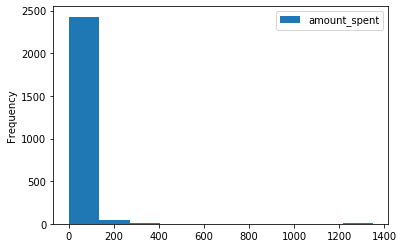

In [195]:
# your code here
orders[['Country', 'amount_spent']][orders['Country'] == 'Spain'].plot(kind='hist')

#### Select all orders made in the month of August.

In [175]:
# your code here
orders.query('month == 8')

index  InvoiceNo StockCode  year  month  day  hour  \
199475  199475     561904     22075  2011      8    1     8   
199476  199476     561904    85049E  2011      8    1     8   
199477  199477     561905     21385  2011      8    1     9   
199478  199478     561905    84970L  2011      8    1     9   
199479  199479     561905    84970S  2011      8    1     9   
199480  199480     561905     84978  2011      8    1     9   
199481  199481     561905     21754  2011      8    1     9   
199482  199482     561905     23226  2011      8    1     9   
199483  199483     561905     21715  2011      8    1     9   
199484  199484     561905     21716  2011      8    1     9   
199485  199485     561905     21746  2011      8    1     9   
199486  199486     561905     21755  2011      8    1     9   
199487  199487     561906     22367  2011      8    1    10   
199488  199488     561906     20914  2011      8    1    10   
199489  199489     561906     21240  2011      8    1    10   
199490  199490     561906     20725  2011      8    1    10   
199491  199491     561906     20726  2011      8    1    10   
199492  199492     561906     22382  2011      8    1    10   
199493  199493     561906     22629  2011      8    1    10   
199494  199494     561906     22384  2011      8    1    10   
199495  199495     561906     23206  2011      8    1    10   
199496  199496     561906     23209  2011      8    1    10   
199497  199497     561906     22898  2011      8    1    10   
199498  199498     561906     21035  2011      8    1    10   
199499  199499     561906     21217  2011      8    1    10   
199500  199500     561906     21155  2011      8    1    10   
199501  199501     561906     21154  2011      8    1    10   
199502  199502     561906     21094  2011      8    1    10   
199503  199503     561906     21080  2011      8    1    10   
199504  199504     561906     84991  2011      8    1    10   
...        ...        ...       ...   ...    ...  ...   ...   
226458  226458     565067    85183B  2011      8    3    17   
226459  226459     565067     22065  2011      8    3    17   
226460  226460     565067     22900  2011      8    3    17   
226461  226461     565067     21508  2011      8    3    17   
226462  226462     565067     22713  2011      8    3    17   
226463  226463     565067     22716  2011      8    3    17   
226464  226464     565067     21558  2011      8    3    17   
226465  226465     565067     22352  2011      8    3    17   
226466  226466     565067    84569A  2011      8    3    17   
226467  226467     565067    84569D  2011      8    3    17   
226468  226468     565067    84559A  2011      8    3    17   
226469  226469     565067    84559B  2011      8    3    17   
226470  226470     565067    84558A  2011      8    3    17   
226471  226471     565067     22189  2011      8    3    17   
226472  226472     565067     22188  2011      8    3    17   
226473  226473     565067     22224  2011      8    3    17   
226474  226474     565067     21248  2011      8    3    17   
226475  226475     565067     22109  2011      8    3    17   
226476  226476     565067     22107  2011      8    3    17   
226477  226477     565067    84519B  2011      8    3    17   
226478  226478     565067     21559  2011      8    3    17   
226479  226479     565067     22352  2011      8    3    17   
226480  226480     565067     21558  2011      8    3    17   
226481  226481     565067     22616  2011      8    3    17   
226482  226482     565067     16048  2011      8    3    17   
226483  226483     565067     22644  2011      8    3    17   
226484  226484     565067     22645  2011      8    3    17   
226485  226485     565067     22637  2011      8    3    17   
226486  226486     565067     22646  2011      8    3    17   
226487  226487     565067     22741  2011      8    3    17   

                                Description  Quantity          InvoiceDate  \
199475          6 ribbon

#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [180]:
# your code here
orders.query('month == 8').groupby('Country').count()

index  InvoiceNo  StockCode   year  month    day   hour  \
Country                                                                    
Australia          107        107        107    107    107    107    107   
Austria             88         88         88     88     88     88     88   
Belgium            194        194        194    194    194    194    194   
Canada               5          5          5      5      5      5      5   
Channel Islands    140        140        140    140    140    140    140   
Denmark             16         16         16     16     16     16     16   
EIRE               593        593        593    593    593    593    593   
Finland             61         61         61     61     61     61     61   
France             569        569        569    569    569    569    569   
Germany            795        795        795    795    795    795    795   
Iceland             22         22         22     22     22     22     22   
Israel             171        171        171    171    171    171    171   
Italy               95         95         95     95     95     95     95   
Malta               55         55         55     55     55     55     55   
Netherlands        280        280        280    280    280    280    280   
Norway              77         77         77     77     77     77     77   
Poland              17         17         17     17     17     17     17   
Portugal            41         41         41     41     41     41     41   
Spain              252        252        252    252    252    252    252   
Sweden              40         40         40     40     40     40     40   
Switzerland        267        267        267    267    267    267    267   
United Kingdom   23105      23105      23105  23105  23105  23105  23105   
Unspecified         23         23         23     23     23     23     23   

                 Description  Quantity  InvoiceDate  UnitPrice  CustomerID  \
Country                                                                      
Australia                107       107          107        107         107   
Austria                   88        88           88         88          88   
Belgium                  194       194          194        194         194   
Canada                     5         5            5          5           5   
Channel Islands          140       140          140        140         140   
Denmark                   16        16           16         16          16   
EIRE                     593       593          593        593         593   
Finland                   61        61           61         61          61   
France                   569       569          569        569         569   
Germany                  795       795          795        795         795   
Iceland                   22        22           22         22          22   
Israel                   171       171          171        171         171   
Italy                     95        95           95         95          95   
Malta                     55        55           55         55          55   
Netherlands              280       280          280        280         280   
Norway                    77        77           77         77          77   
Poland                    17        17           17         17          17   
Portugal                  41        41           41         41          41   
Spain                    252       252          252        252         252   
Sweden                    40        40           40         40          40   
Switzerland              267       267          267        267         267   
United Kingdom         23105     23105        23105      23105       23105   
Unspecified               23        23           23         23          23   

                 amount_spent  
Country                        
Australia                 107  
Austria                    88  
Belgium                   194  
Canad

#### What's the  average amount of money spent by country?

In [184]:
# your code here
orders[['Country', 'amount_spent']].groupby('Country').mean()

amount_spent
Country                           
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia             16.213333
Singapore                95.852658
Spain                    24.779521
Sweden                   85.096075
Switzerland              30.642752
USA                      20.002179
United Arab Emirates     27.974706
United Kingdom           20.625073
Unspecified              10.930615

#### What's the most expensive item?

In [185]:
# your code here
orders[orders.amount_spent == orders.amount_spent.max()]

index  InvoiceNo StockCode  year  month  day  hour  \
397451  397451     581483     23843  2011     12    5     9   

                        Description  Quantity          InvoiceDate  UnitPrice  \
397451  paper craft . little birdie     80995  2011-12-09 09:15:00       2.08   

        CustomerID         Country  amount_spent  
397451       16446  United Kingdom      168469.6

#### What is the average amount spent per year?

In [186]:
# your code here
orders[['year', 'amount_spent']].groupby('year').mean()

amount_spent
year              
2010     21.892733
2011     22.430074